## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
common_column = mouse_metadata.columns & study_results.columns
master_data = pd.merge(mouse_metadata, study_results, on = common_column[0])
master_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
num_mouse = len(master_data["Mouse ID"].value_counts())
print(f"Number of mice in the datafrme is {num_mouse}.")

Number of mice in the datafrme is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
master_data["duplicated_check"] = master_data["Mouse ID"] + "_"+ master_data["Timepoint"].astype(str)
master_data[master_data["duplicated_check"].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated_check
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


### Mouse ID `g989` has duplicated timepoint

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_masterdata = master_data.drop(index=master_data[master_data["duplicated_check"].duplicated()].index)
clean_masterdata = clean_masterdata.drop(columns = "duplicated_check")
clean_masterdata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mouse = len(clean_masterdata["Mouse ID"].value_counts())
print(f"The number of mice in clean dataset has {num_mouse}.")

The number of mice in clean dataset has 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_stats_regimen = (clean_masterdata.groupby("Drug Regimen")
                         .agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})).applymap("{:.2f}".format)
                        
summary_stats_regimen


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar Plots

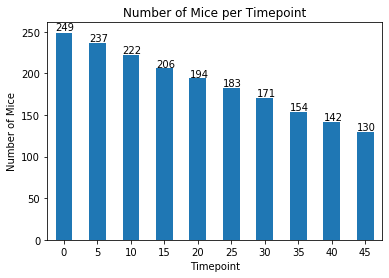

In [71]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
num_of_count_timepoint = clean_masterdata.groupby("Timepoint").agg(count_of_mice = ("Timepoint","count"))
num_chart = num_of_count_timepoint.plot(kind = "bar", legend = False, title = "Number of Mice per Timepoint",rot = 0)
num_chart.set_ylabel("Number of Mice")

# getting value for each bar
for p in num_chart.patches:
     num_chart.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))

plt.show()

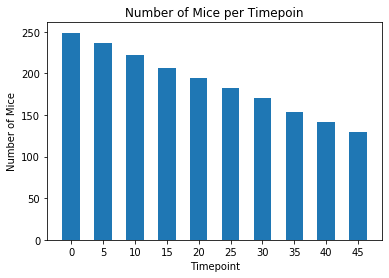

In [84]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
timepoint_label = clean_masterdata["Timepoint"].value_counts().keys().astype(str)
num_of_mice = clean_masterdata["Timepoint"].value_counts().values
plt.bar(timepoint_label, num_of_mice, width=0.55)
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Timepoin")

plt.show()

## Pie Plots

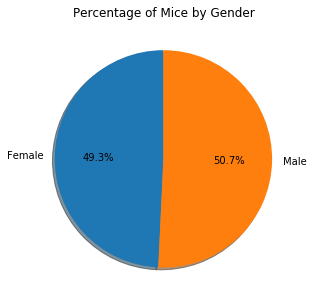

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_summary = clean_masterdata.groupby("Sex").agg(count = ("Sex","count")).rename(columns = {"count":"Number of Mice"})
pie_chart = gender_summary.plot(kind = "pie",y = "Number of Mice", figsize = (5,5),
                    title= "Percentage of Mice by Gender", autopct="%1.1f%%",
                    shadow=True, startangle=90, legend = False)

pie_chart.set_ylabel("")
plt.show()


/Users/yangsun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


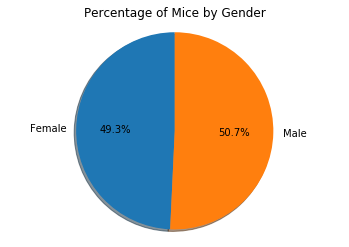

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_value = gender_summary.values
gender = gender_summary.index

plt.pie(pie_value, labels = gender, autopct="%1.1f%%",
        shadow = True, startangle=90)
plt.title("Percentage of Mice by Gender")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
